In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
data = 'ASM01.csv'

df = pd.read_csv(data)

df

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4
...,...,...,...,...,...,...
1009,Air and Sea Travel,2024 January,Arrivals,Air,Thousand,1271.3
1010,Air and Sea Travel,2024 January,Arrivals,Sea,Thousand,31.1
1011,Air and Sea Travel,2024 January,Departures,All modes of transport,Thousand,1281.7
1012,Air and Sea Travel,2024 January,Departures,Air,Thousand,1239.5


In [83]:
# Removing columns STATISTIC Label and UNIT on axis 1 -> columns
df = df.drop(['STATISTIC Label', 'UNIT'], axis=1)


In [84]:
# Convert the 'Month' column to a datetime object with Year-Month format
df['Year-Month'] = pd.to_datetime(df['Month'], format='%Y %B').dt.strftime('%Y-%m')

In [85]:
# Removing column Month
df.drop(columns='Month', inplace=True)

In [86]:
df

,Direction,Mode,VALUE,Year-Month
0,Arrivals,All modes of transport,773.2,2010-01
1,Arrivals,Air,728.4,2010-01
2,Arrivals,Sea,44.8,2010-01
3,Departures,All modes of transport,791.7,2010-01
4,Departures,Air,732.4,2010-01
...,...,...,...,...
1009,Arrivals,Air,1271.3,2024-01
1010,Arrivals,Sea,31.1,2024-01
1011,Departures,All modes of transport,1281.7,2024-01
1012,Departures,Air,1239.5,2024-01


In [87]:
# Replacing "All modes of transport" to "Total" in the "Mode" column
df["Mode"] = df["Mode"].replace({"All modes of transport": "Total"})

In [88]:
# Concatenating "Direction" and "Mode" columns with a separator and assigning it back to the DataFrame
df["Direction-Mode"] = df["Direction"] + " " + df["Mode"]

# Dropping the original "Direction" and "Mode" columns as they are now combined
df.drop(["Direction", "Mode"], axis=1, inplace=True)

In [89]:
# Organized all the Data in only 3 columns, but still with relevant categorical data on values
# also arranged in rows and columns  
df

,VALUE,Year-Month,Direction-Mode
0,773.2,2010-01,Arrivals Total
1,728.4,2010-01,Arrivals Air
2,44.8,2010-01,Arrivals Sea
3,791.7,2010-01,Departures Total
4,732.4,2010-01,Departures Air
...,...,...,...
1009,1271.3,2024-01,Arrivals Air
1010,31.1,2024-01,Arrivals Sea
1011,1281.7,2024-01,Departures Total
1012,1239.5,2024-01,Departures Air


In [90]:
# Pivoting the DataFrame creating new columns with 'VALUE' values
df_pivoted = df.pivot_table(index='Year-Month', columns='Direction-Mode', values='VALUE')

# Removing the label 'Direction-Mode' from the columns
df_pivoted.columns.name = None

#Year_Month start be index

df_pivoted




,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
Year-Month,,,,,,
2010-01,728.4,44.8,773.2,732.4,59.3,791.7
2010-02,757.2,46.9,804.0,757.2,46.1,803.2
2010-03,906.6,83.3,989.8,919.6,81.5,1001.1
2010-04,735.8,168.7,904.5,709.5,172.5,882.0
2010-05,968.5,146.4,1114.9,977.9,132.9,1110.8
...,...,...,...,...,...,...
2023-09,1814.8,98.7,1913.5,1799.0,111.1,1910.1
2023-10,1742.1,76.5,1818.6,1752.1,77.6,1829.7
2023-11,1352.8,44.5,1397.4,1316.5,45.0,1361.5


In [91]:
# Dataframe cleaned and prepared to perform summarization
# Now All data is on numeric format
# Lets plot the reorganized data to see what can visualize


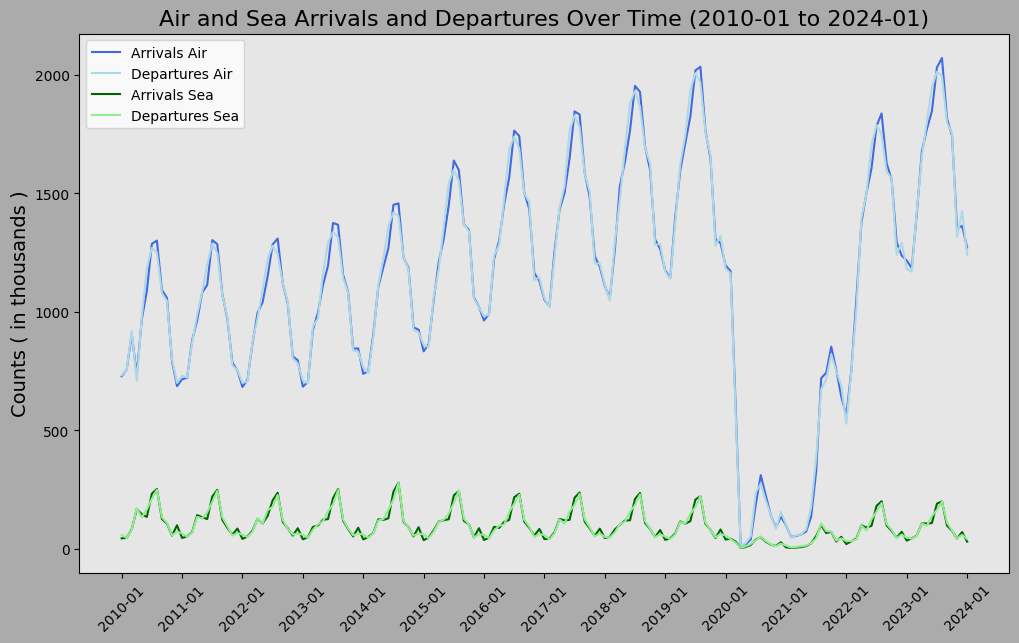

In [92]:
#importing ticker to adjust number of months on axis Y
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(12, 7))

#adjusting colors
fig.patch.set_facecolor('#ababab')
ax.set_facecolor('#e6e6e6')

# Plotting
ax.plot(df_pivoted["Arrivals Air"], label='Arrivals Air', color='royalblue')
ax.plot(df_pivoted["Departures Air"], label='Departures Air', color='lightblue')
ax.plot(df_pivoted["Arrivals Sea"], label='Arrivals Sea', color='darkgreen')
ax.plot(df_pivoted["Departures Sea"], label='Departures Sea', color='lightgreen')



ax.set_title('Air and Sea Arrivals and Departures Over Time (2010-01 to 2024-01)', fontsize=16)
ax.set_ylabel('Counts ( in thousands )', fontsize=14)

# Adjusting step of tickers in 12 to can read 
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))

plt.xticks(rotation=45)
ax.legend()

plt.show()

In [93]:
#Checking the pivoted dataframe info about data types and nulls count
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 2010-01 to 2024-01
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arrivals Air      169 non-null    float64
 1   Arrivals Sea      169 non-null    float64
 2   Arrivals Total    169 non-null    float64
 3   Departures Air    169 non-null    float64
 4   Departures Sea    169 non-null    float64
 5   Departures Total  169 non-null    float64
dtypes: float64(6)
memory usage: 9.2+ KB


In [94]:
#Visualizing Descriptive Analytics rounding on 2 the decimals
df_pivoted.describe().round(2)

,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
count,169.00,169.00,169.00,169.00,169.00,169.00
mean,1129.84,97.66,1227.50,1132.35,97.40,1229.76
std,474.69,63.11,518.13,474.85,60.38,516.41
min,12.10,4.00,16.10,12.80,4.90,17.80
25%,846.00,48.90,911.40,836.50,52.30,895.10
50%,1171.70,87.60,1236.60,1178.50,79.80,1256.40
75%,1450.30,122.50,1576.00,1438.70,127.80,1577.60
max,2070.20,279.50,2270.70,2012.40,278.90,2194.30


In [95]:
# / Calcing Mean Median and Mode to see the central tendencie / #

# Considerations

# Trend and Seasonality: In time series analysis, it's also important to consider trend and seasonality. 

# These factors can significantly affect your central tendency measures. 
# For example, a steadily increasing trend could make the mean over the entire series less representative of any specific point in time.

# Outliers: Especially with mean calculations, consider the impact of outliers. 

# If your time series data includes extreme values, they could skew the mean.

# How can see on described statistics,column Arrivals Air got close of 0 



In [96]:
# Getting Mean Values from each column
mean_df = df_pivoted.mean()

print("\nMean values for: (Thousands)")
print(mean_df)


Mean values for: (Thousands)
Arrivals Air        1129.835503
Arrivals Sea          97.657988
Arrivals Total      1227.495858
Departures Air      1132.353254
Departures Sea        97.401183
Departures Total    1229.757396
dtype: float64


In [97]:
# Getting Median Values from each column
median_df = df_pivoted.median()

print("\nMedian values for: (Thousands)")
print(median_df)


Median values for: (Thousands)
Arrivals Air        1171.7
Arrivals Sea          87.6
Arrivals Total      1236.6
Departures Air      1178.5
Departures Sea        79.8
Departures Total    1256.4
dtype: float64


In [98]:
# Getting Mode Value(s) from each column
mode_df = df_pivoted.mode()

#print("\nMode values for: (Thousands)")
mode_df

#mode = df_pivoted['Departures Total'].mode()

#print(mode)

#Too many modes to some columns because its a time series dataframe

,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
0,1646.3,31.3,1214.8,700.5,56.3,17.8
1,NaN,84.3,1235.1,709.5,NaN,36.3
2,NaN,86.8,1523.2,NaN,NaN,53.2
3,NaN,115.3,NaN,NaN,NaN,66.5
4,NaN,119.9,NaN,NaN,NaN,73.0
...,...,...,...,...,...,...
164,NaN,NaN,NaN,NaN,NaN,2116.8
165,NaN,NaN,NaN,NaN,NaN,2177.2
166,NaN,NaN,NaN,NaN,NaN,2183.9
167,NaN,NaN,NaN,NaN,NaN,2191.9


In [116]:
print(f"Mean of Arrivals Air: {mean_df['Arrivals Air']}")


Mean of Arrivals Air: 1129.83550295858


In [117]:
print(f"Median of Arrivals Air: {median_df['Arrivals Air']}")


Median of Arrivals Air: 1171.7


In [118]:
print(f"Mode of Arrivals Air: {mode_df['Arrivals Air']}")

Mode of Arrivals Air: 0      1646.3
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
164       NaN
165       NaN
166       NaN
167       NaN
168       NaN
Name: Arrivals Air, Length: 169, dtype: float64


In [120]:
mode_df['Arrivals Air'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 169 entries, 0 to 168
Series name: Arrivals Air
Non-Null Count  Dtype  
--------------  -----  
1 non-null      float64
dtypes: float64(1)
memory usage: 1.4 KB


In [122]:
mode_df['Arrivals Air'][0]

1646.3

In [ ]:
#In this context:

#The mean will give you the average arrivals by air, which can be influenced by outliers or very high or low values.
#The median will provide the middle value of the dataset when sorted, offering a better measure of central tendency if your data is skewed.
#The mode will show the most frequently occurring number of arrivals by air. If there's only one mode, it indicates a clear peak in your data distribution.
#By comparing these three measures, you can gain insights into the distribution of your "Arrivals Air" data. For instance, if the mean is significantly higher than the median, it might suggest the presence of high outliers affecting the average.

In [99]:
# Getting Max Values from each column
max_df = df_pivoted.max()

print("\nMax values for: (Thousands)")
print(max_df)


Max values for: (Thousands)
Arrivals Air        2070.2
Arrivals Sea         279.5
Arrivals Total      2270.7
Departures Air      2012.4
Departures Sea       278.9
Departures Total    2194.3
dtype: float64


In [100]:
# Getting Min Values from each column
min_df = df_pivoted.min()

print("\nMin values for: (Thousands)")
print(min_df)


Min values for: (Thousands)
Arrivals Air        12.1
Arrivals Sea         4.0
Arrivals Total      16.1
Departures Air      12.8
Departures Sea       4.9
Departures Total    17.8
dtype: float64


In [101]:
####


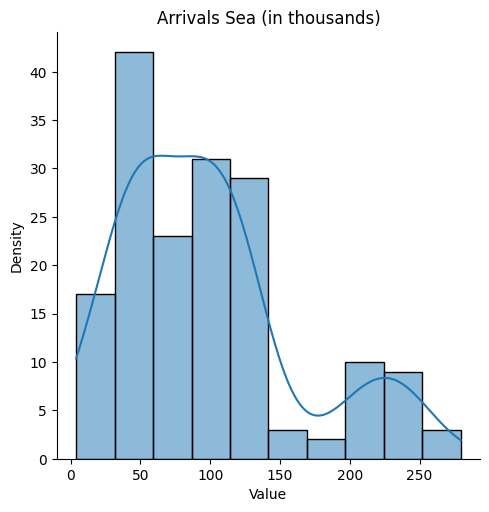

In [102]:
data = df_pivoted['Arrivals Sea']

#sns.distplot(data, bins=10, hist=True, kde=True, label = 'Arrivals Total (in thousands)')
sns.displot(data, bins=10, kde=True)

plt.title('Arrivals Sea (in thousands)')
plt.xlabel('Value')
plt.ylabel('Density')
#plt.legend(labels=['Arrivals Total (in thousands)'])
plt.show()

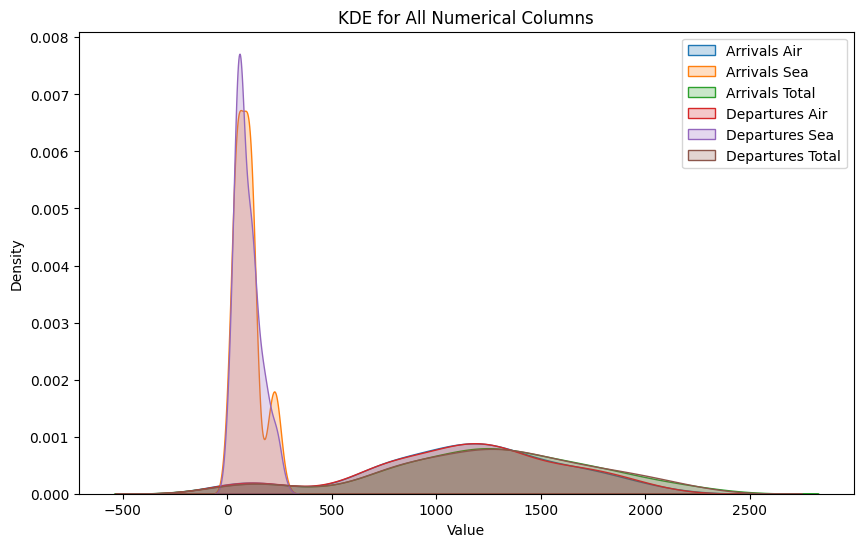

In [103]:
plt.figure(figsize=(10, 6)) 

for column in df_pivoted.columns:
    # Check if the column is numerical
    if df_pivoted[column].dtype in ['int64', 'float64']:
        sns.kdeplot(df_pivoted[column], fill=True, label=column)

plt.title('KDE for All Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

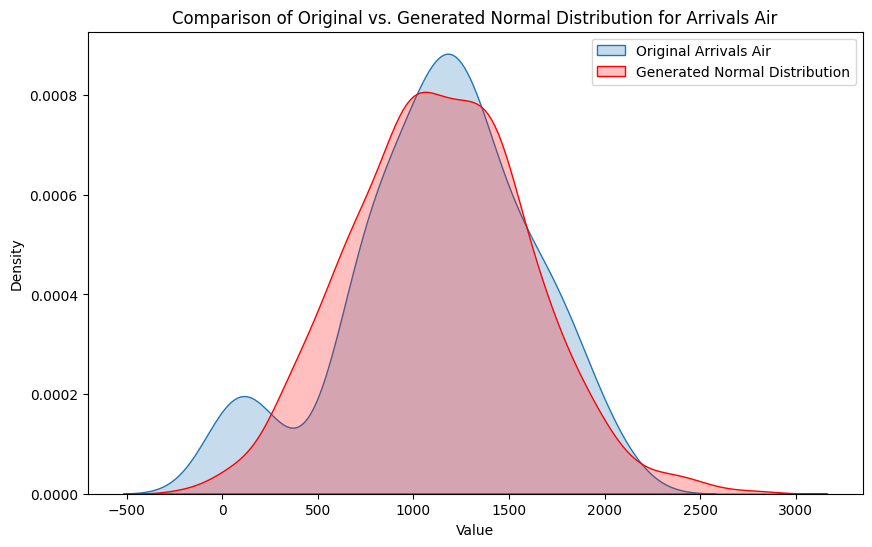

In [104]:
import numpy as np

# Calculate the mean and standard deviation of the 'Arrivals - Air' column
mean_arrivals_air = df_pivoted['Arrivals Air'].mean()
std_arrivals_air = df_pivoted['Arrivals Air'].std()

# Generate a normally distributed dataset with the same mean and standard deviation
normal_arrivals_air = np.random.normal(loc=mean_arrivals_air, scale=std_arrivals_air, size=1000)

# Example: Plot the original data vs. the generated normal distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df_pivoted['Arrivals Air'], fill=True, label='Original Arrivals Air')
sns.kdeplot(normal_arrivals_air, fill=True, label='Generated Normal Distribution', color='red')
plt.legend()
plt.title('Comparison of Original vs. Generated Normal Distribution for Arrivals Air')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


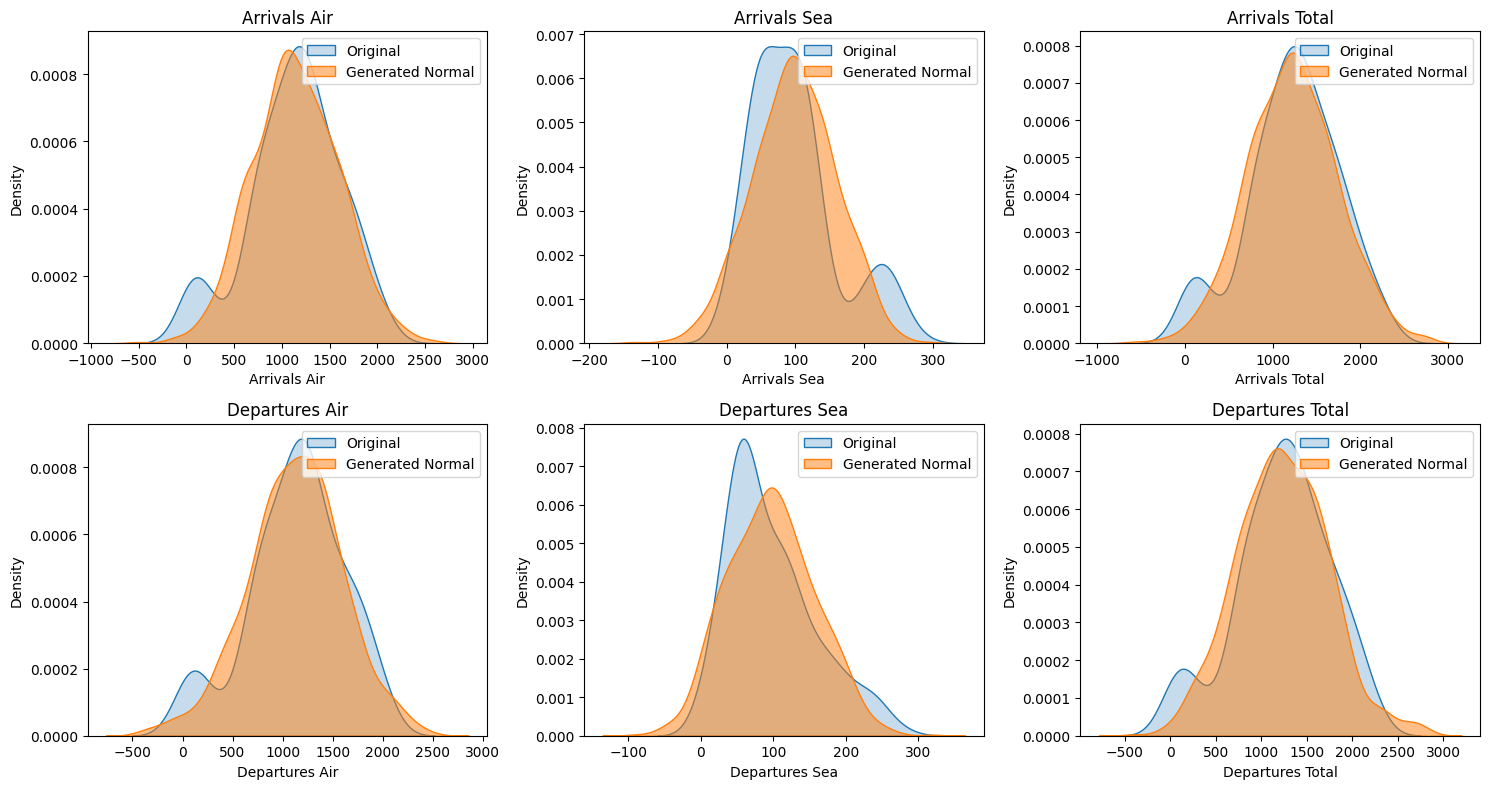

In [105]:
num_columns = df_pivoted.shape[1]
n_cols = 3  # Number of columns in the plot grid
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original')
    
    # Generated normal distribution data based on the column's mean and std
    mean = df_pivoted[column].mean()
    std = df_pivoted[column].std()
    normal_data = np.random.normal(loc=mean, scale=std, size=1000)
    sns.kdeplot(normal_data, fill=True, label='Generated Normal', alpha=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()

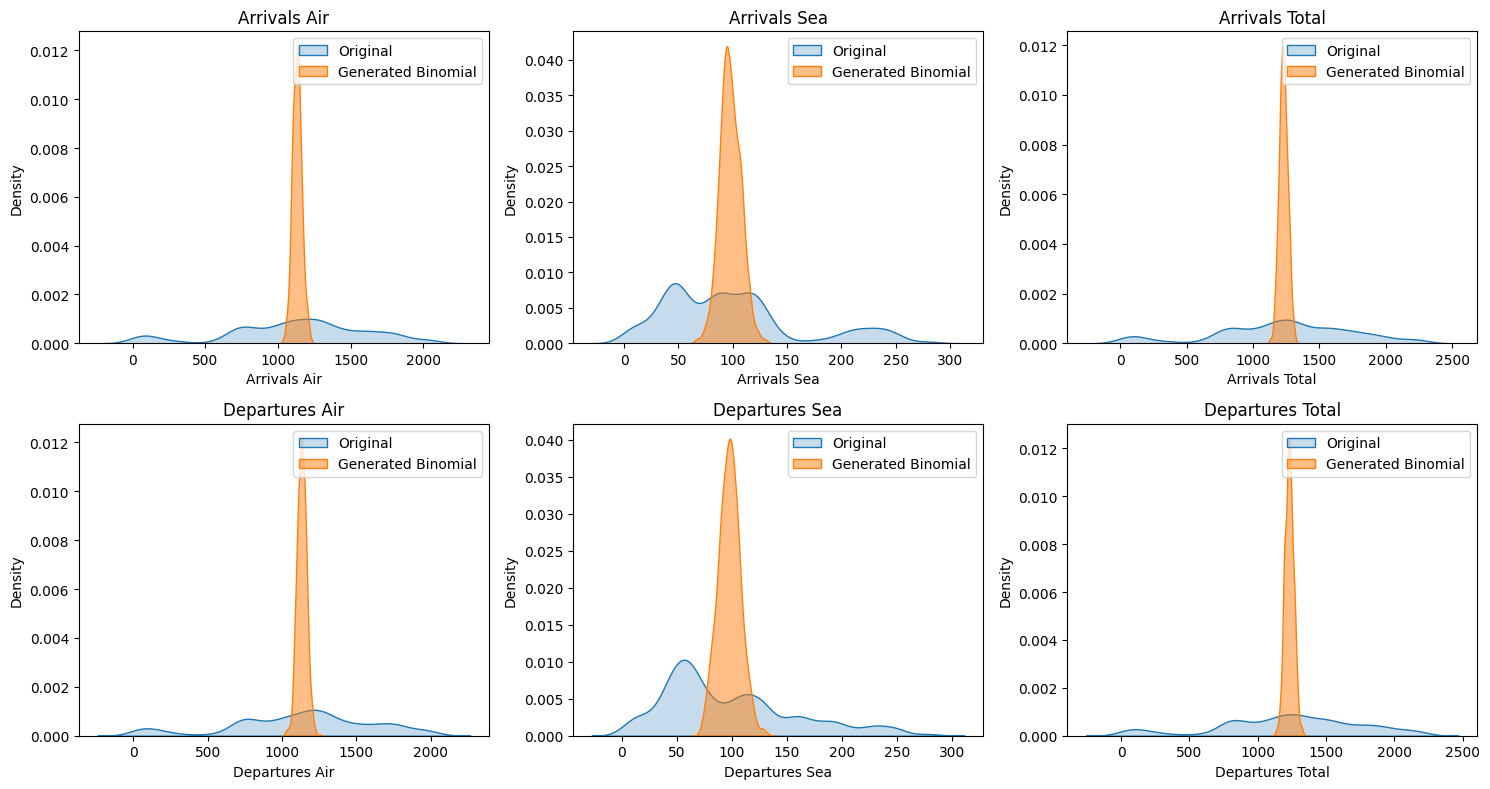

In [106]:
n = 10000  # Fixed number of trials for the binomial distribution
n_cols = 3  # Number of columns in the plot grid
num_columns = df_pivoted.shape[1]
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.5)
    
    # Approximating 'p' for binomial distribution
    mean = df_pivoted[column].mean()
    p = mean / n  # Simplified approximation, assuming the mean can directly translate to success probability
    
    # Adjust 'p' to not exceed 1 in cases where this method oversimplifies
    p = min(p, 1)
    
    # Generated binomial distribution data
    binomial_data = np.random.binomial(n, p, size=1000)
    sns.kdeplot(binomial_data, fill=True, label='Generated Binomial', alpha=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()

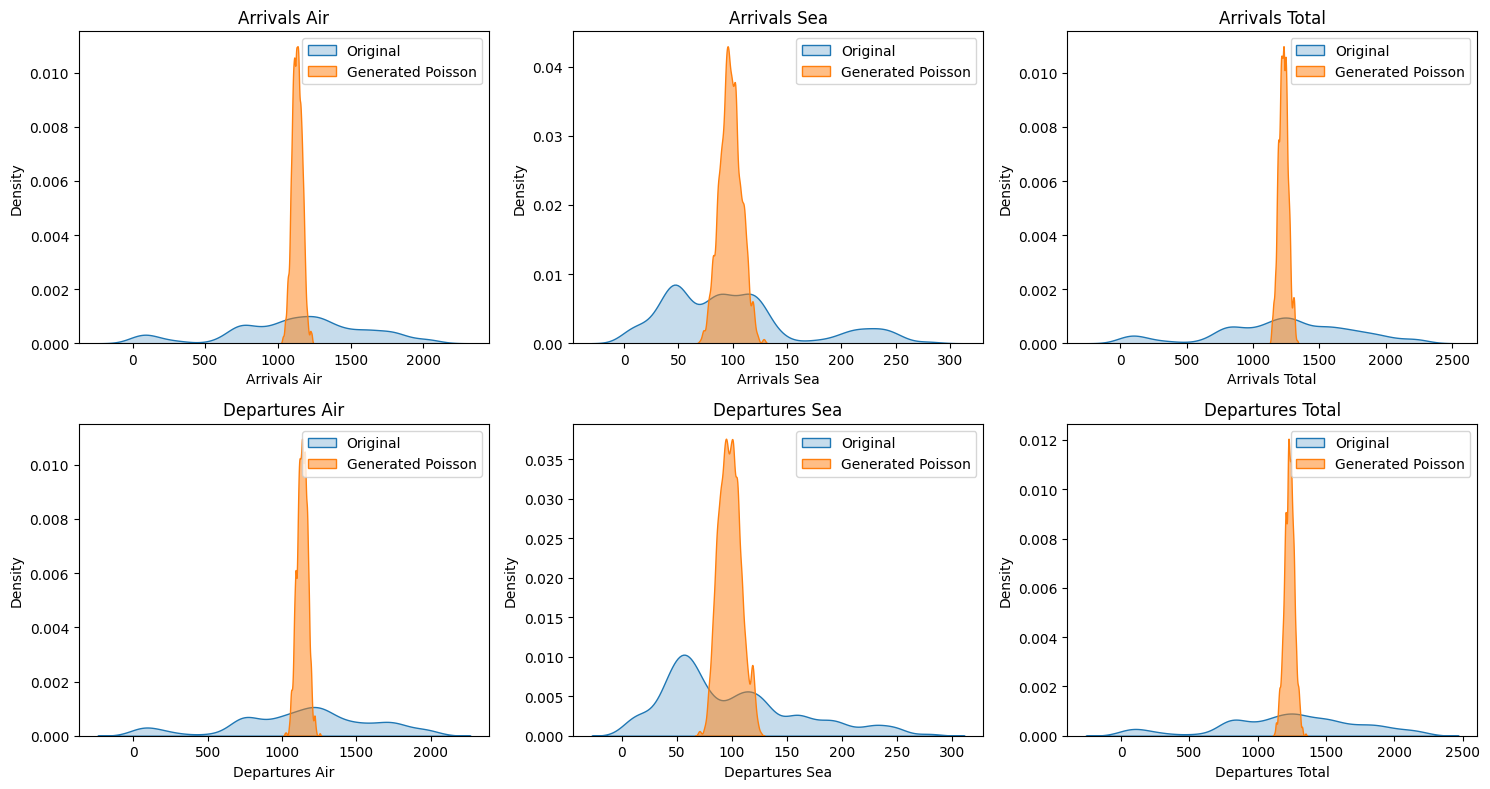

In [107]:
n_cols = 3  # Number of columns in the plot grid
num_columns = df_pivoted.shape[1]
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.5)
    
    # Calculate lambda (mean) for the Poisson distribution from the original data
    lambda_param = df_pivoted[column].mean()
    
    # Generated Poisson distribution data based on the column's mean
    poisson_data = np.random.poisson(lam=lambda_param, size=1000)
    sns.kdeplot(poisson_data, fill=True, label='Generated Poisson', alpha=0.5, bw_adjust=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()

In [108]:
#import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a pandas DataFrame 'data' with a datetime index and a column named 'value'
# Replace 'data.csv' with the path to your data file
data = pd.read_csv('data.csv', index_col='date', parse_dates=True)

# Assuming you want to forecast the next 10 time steps
forecast_horizon = 10

# Define the ARIMA model
# You need to specify the order (p, d, q) of the ARIMA model
# Here, we're using (1, 1, 1) as an example
model = ARIMA(data, order=(1, 1, 1))

# Fit the ARIMA model
model_fit = model.fit()

# Forecast the next 'forecast_horizon' time steps
forecast = model_fit.forecast(steps=forecast_horizon)

# Print the forecast
print(forecast)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'